**MOVIE RECOMMENDATION SYSTEM**

L.Yash Kumar

AM.EN.U4CSE19262

We use movies_data dataset and for a given user liked movie we will output the top 10 movies to be recommended.

Main features of the data we use are genres which says the genre of the movie,keywords has the main plots of the movie.
Title is 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import sigmoid_kernel


#### Loading the Dataset
Loading the Dataset provided by Kaggle <a href = "https://www.kaggle.com/rounakbanik/the-movies-dataset">The Movies Dataset</a> to a Pandas DataFrame

In [2]:
df = pd.read_csv('project.csv')

In [3]:
df.columns.tolist()

['index',
 'budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'cast',
 'crew',
 'director']

We have our dataframe ready, so let`s visualize it

In [4]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [5]:
df.describe()

,index,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [7]:
print(df.columns.values)

['index' 'budget' 'genres' 'homepage' 'id' 'keywords' 'original_language'
 'original_title' 'overview' 'popularity' 'production_companies'
 'production_countries' 'release_date' 'revenue' 'runtime'
 'spoken_languages' 'status' 'tagline' 'title' 'vote_average' 'vote_count'
 'cast' 'crew' 'director']


Onvisualizing the dataset, you may have noticed that it has many extra info about a movie. We don’t need all of them. So, we choose keywords, cast, genres, director and title column to use as our feature set.

In [8]:
features = ['genres', 'keywords', 'title', 'cast', 'director']

As you may can noticed that some columns have NaN data points that will create a problem for us, so what we will do is instead of NaN values we will replace it with empty string ('').

In [9]:
df[features].isnull().sum()

genres       28
keywords    412
title         0
cast         43
director     30
dtype: int64

In [10]:
df = df.fillna(' ')

In [11]:
df[features].isnull().sum()

genres      0
keywords    0
title       0
cast        0
director    0
dtype: int64

In [12]:
df_copy = df[features]

In [13]:
df_copy.head()

,genres,keywords,title,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Avatar,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,Spectre,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Dark Knight Rises,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,John Carter,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


In [14]:

le = LabelEncoder()
for col in features:
    df_copy[col] = le.fit_transform(df_copy[col])

C:\Users\Yash\AppData\Local\Temp/ipykernel_9768/3862936450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col] = le.fit_transform(df_copy[col])


In [15]:
df_copy.head()

,genres,keywords,title,cast,director
0,60,1026,379,3973,888
1,328,2749,2648,2293,772
2,30,3637,3181,967,1972
3,131,1078,3612,801,362
4,72,366,1901,4330,97


array([[<AxesSubplot:title={'center':'genres'}>,
        <AxesSubplot:title={'center':'keywords'}>],
       [<AxesSubplot:title={'center':'title'}>,
        <AxesSubplot:title={'center':'cast'}>],
       [<AxesSubplot:title={'center':'director'}>, <AxesSubplot:>]],
      dtype=object)

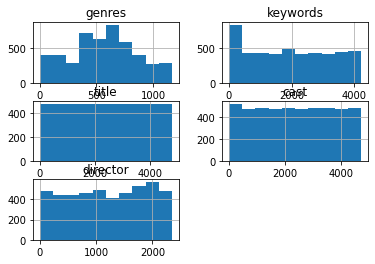

In [16]:
df_copy.hist()

<AxesSubplot:>

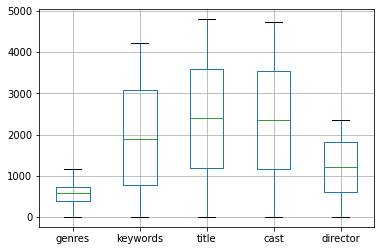

In [17]:
df_copy.boxplot()

Our next task is to create a function for combining the values of these columns into a single string

In [18]:
def combine_features(row):
    return row['title']+' '+row['genres']+' '+row['director']+' '+row['keywords']+' '+row['cast']

Now, we need to call this function over each row of our dataframe. But, before doing that, we need to clean and preprocess the data for our use. We will fill all the NaN values with blank string in the dataframe

In [19]:
for feature in features:
    df[feature] = df[feature].fillna('')

In [20]:
df[features].head()

,genres,keywords,title,cast,director
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,Avatar,Sam Worthington Zoe Saldana Sigourney Weaver S...,James Cameron
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,Pirates of the Caribbean: At World's End,Johnny Depp Orlando Bloom Keira Knightley Stel...,Gore Verbinski
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,Spectre,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,Sam Mendes
3,Action Crime Drama Thriller,dc comics crime fighter terrorist secret ident...,The Dark Knight Rises,Christian Bale Michael Caine Gary Oldman Anne ...,Christopher Nolan
4,Action Adventure Science Fiction,based on novel mars medallion space travel pri...,John Carter,Taylor Kitsch Lynn Collins Samantha Morton Wil...,Andrew Stanton


applying combine_feature method over each row of Dataframe and storing the combined string in "combined_features" column

In [21]:
df['combined_features'] = df.apply(combine_features, axis = 1)

In [22]:
df['combined_features']

0       Avatar Action Adventure Fantasy Science Fictio...
1       Pirates of the Caribbean: At World's End Adven...
2       Spectre Action Adventure Crime Sam Mendes spy ...
3       The Dark Knight Rises Action Crime Drama Thril...
4       John Carter Action Adventure Science Fiction A...
                              ...                        
4798    El Mariachi Action Crime Thriller Robert Rodri...
4799    Newlyweds Comedy Romance Edward Burns   Edward...
4800    Signed, Sealed, Delivered Comedy Drama Romance...
4801    Shanghai Calling   Daniel Hsia   Daniel Henney...
4802    My Date with Drew Documentary Brian Herzlinger...
Name: combined_features, Length: 4803, dtype: object

In [23]:
print(df.loc[0, 'combined_features'])

Avatar Action Adventure Fantasy Science Fiction James Cameron culture clash future space war space colony society Sam Worthington Zoe Saldana Sigourney Weaver Stephen Lang Michelle Rodriguez


Our next step is to get the title of the movie that the user currently likes. Then we will find the index of that movie. After that, we will access the row corresponding to this movie in the similarity matrix. Thus, we will get the similarity scores of all other movies from the current movie. Then we will enumerate through all the similarity scores of that movie to make a tuple of movie index and similarity score. This will convert a row of similarity scores like this- [1 0.5 0.2 0.9] to this- [(0, 1) (1, 0.5) (2, 0.2) (3, 0.9)] . Here, each item is in this form- (movie index, similarity score)

In [24]:
def get_title_from_index(index):
    return df[df.index == index]["title"].values[0]
def get_index_from_title(title):
    return df[df.title == title]["index"].values[0]

Now that we have obtained the combined strings, we can now feed these strings to a CountVectorizer() object for getting the count matrix.

In [25]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined_features'])

In [52]:
tf = TfidfVectorizer()
help_matrix = tf.fit_transform(df['combined_features'])
help_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**Cosine similarity for Count_matrix**

In [27]:
cosine_sim = cosine_similarity(count_matrix)
cosine_sim

array([[1.        , 0.09078413, 0.11572751, ..., 0.        , 0.        ,
        0.        ],
       [0.09078413, 1.        , 0.06537205, ..., 0.06052275, 0.        ,
        0.        ],
       [0.11572751, 0.06537205, 1.        , ..., 0.        , 0.10206207,
        0.        ],
       ...,
       [0.        , 0.06052275, 0.        , ..., 1.        , 0.        ,
        0.07142857],
       [0.        , 0.        , 0.10206207, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.07142857, 0.        ,
        1.        ]])

In [28]:
movie_user_likes = "Star Trek Beyond"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index])) #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it

We will sort the list similar_movies according to similarity scores in descending order. Since the most similar movie to a given movie will be itself, we will discard the first element after sorting the movies.

In [29]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

Then, we will run a loop to print first 5 entries from sorted_similar_movies list.

In [30]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to Star Trek Beyond are:

Star Trek Into Darkness
Star Trek
Guardians of the Galaxy
Avatar
Star Trek: Insurrection
Star Wars: Episode III - Revenge of the Sith
Avengers: Age of Ultron
Star Wars: Clone Wars: Volume 1
Star Trek: Nemesis
Mad Max Beyond Thunderdome
Zathura: A Space Adventure


**Cosine similarity for help_matrix(tfdi matrix)**

In [31]:
cosine_sim_tfid = cosine_similarity(help_matrix)
cosine_sim_tfid

array([[1.        , 0.0237934 , 0.04095406, ..., 0.        , 0.        ,
        0.        ],
       [0.0237934 , 1.        , 0.01318767, ..., 0.03982525, 0.        ,
        0.        ],
       [0.04095406, 0.01318767, 1.        , ..., 0.        , 0.05773922,
        0.        ],
       ...,
       [0.        , 0.03982525, 0.        , ..., 1.        , 0.        ,
        0.05747071],
       [0.        , 0.        , 0.05773922, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05747071, 0.        ,
        1.        ]])

In [32]:
movie_user_likes = "Star Trek Beyond"
movie_index = get_index_from_title(movie_user_likes)
cosine_similar_movies_tfid = list(enumerate(cosine_sim_tfid[movie_index]))

In [33]:
sorted_similar_movies_ct = sorted(cosine_similar_movies_tfid,key=lambda x:x[1],reverse=True)[1:]

In [34]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies_ct:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to Star Trek Beyond are:

Star Trek Into Darkness
Star Trek
Guardians of the Galaxy
Avatar
Star Trek: Insurrection
Star Wars: Episode III - Revenge of the Sith
Walking With Dinosaurs
The Chronicles of Riddick
Star Wars: Clone Wars: Volume 1
Dredd
Paul


**Linear kernel for count matrix**

In [35]:
lin_sim_count = linear_kernel(count_matrix, count_matrix)

In [36]:
movie_user_likes = "Star Trek Beyond"
movie_index = get_index_from_title(movie_user_likes)
similar_movies_lc = list(enumerate(lin_sim_count[movie_index])) #accessing the row corresponding to given movie to find all the similarity scores for that movie and then enumerating over it

In [37]:
sorted_similar_movies_lc = sorted(similar_movies_lc,key=lambda x:x[1],reverse=True)[1:]

In [38]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies_lc:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to Star Trek Beyond are:

Star Trek Into Darkness
Star Trek
Guardians of the Galaxy
Avatar
Star Trek: Insurrection
Avengers: Age of Ultron
Star Wars: Episode III - Revenge of the Sith
Zathura: A Space Adventure
Star Wars: Clone Wars: Volume 1
The Avengers
Captain America: Civil War


**Linear kernel for help_matrix(tfid matrix)**

In [39]:
lin_sim_tfid = linear_kernel(help_matrix, help_matrix)

In [40]:
movie_user_likes = "Star Trek Beyond"
movie_index = get_index_from_title(movie_user_likes)
similar_movies_lt = list(enumerate(lin_sim_tfid[movie_index]))

In [41]:
sorted_similar_movies_lt = sorted(similar_movies_lt,key=lambda x:x[1],reverse=True)[1:]

In [42]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies_lt:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to Star Trek Beyond are:

Star Trek Into Darkness
Star Trek
Guardians of the Galaxy
Avatar
Star Trek: Insurrection
Star Wars: Episode III - Revenge of the Sith
Walking With Dinosaurs
The Chronicles of Riddick
Star Wars: Clone Wars: Volume 1
Dredd
Paul


**Sigmoid kernel for count matrix**

In [43]:
sig_matrix = sigmoid_kernel(count_matrix, count_matrix)

In [44]:
movie_user_likes = "Star Trek Beyond"
movie_index = get_index_from_title(movie_user_likes)
sig_similar_movies_c = list(enumerate(sig_matrix[movie_index]))

In [45]:
sig_sort_similar_movies_c = sorted(sig_similar_movies_c,key=lambda x:x[1],reverse=True)[1:]

In [46]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sig_sort_similar_movies_c:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to Star Trek Beyond are:

Star Trek Into Darkness
Star Trek
Guardians of the Galaxy
Avatar
Star Trek: Insurrection
Avengers: Age of Ultron
Star Wars: Episode III - Revenge of the Sith
Zathura: A Space Adventure
Star Wars: Clone Wars: Volume 1
The Avengers
Captain America: Civil War


**Sigmoid kernel for help matrix(tfid)**

In [47]:
sig_matrix_tfid = sigmoid_kernel(help_matrix, help_matrix)

In [48]:
movie_user_likes = "Star Trek Beyond"
movie_index = get_index_from_title(movie_user_likes)
sig_similar_movies_tf = list(enumerate(sig_matrix_tfid[movie_index]))

In [49]:
sig_sort_similar_movies_tf = sorted(sig_similar_movies_tf,key=lambda x:x[1],reverse=True)[1:]

In [50]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sig_sort_similar_movies_tf:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to Star Trek Beyond are:

Star Trek Into Darkness
Star Trek
Guardians of the Galaxy
Avatar
Star Trek: Insurrection
Star Wars: Episode III - Revenge of the Sith
Walking With Dinosaurs
The Chronicles of Riddick
Star Wars: Clone Wars: Volume 1
Dredd
Paul


**THE END**